## 1. Standard Import

In [4]:
from IPython import display

import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional  as F
from scipy.signal import convolve2d

In [7]:
# for getting summary info on models
from torchsummary import summary

In [8]:
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

## 2. Import the data

### (i) MNIST dataset

In [9]:
# import dataset (comes with colab!)
mnist = pd.read_csv("Mnist_combined.csv", index_col=0)

In [10]:
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
mnist["label"].value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: label, dtype: int64

In [12]:
# Sampling
#data = data.sample(20000, random_state=123)

data_mnist = mnist.to_numpy()

# Extracting only the first 8
labels_mnist = data_mnist[:,0]
data_mnist   = data_mnist[:,1:]

# normalize the data to a range of [0 1]
# Although T.ToTensor() will internally do the Min-Max scaling
data_mnist = data_mnist / np.max(data_mnist)

# Reshape to 2D!
# number of images : data.shape[0]
# number of input channel : 1
# height : 28
# width :  28
data_mnist = data_mnist.reshape(data_mnist.shape[0],1,28,28)

In [13]:
# check sizes
print(data_mnist.shape)
print(labels_mnist.shape)

(70000, 1, 28, 28)
(70000,)


### (ii) FMNIST Dataset

In [14]:
# import dataset (comes with colab!)
fmnist = pd.read_csv("Fmnist.csv")

#### Label	Description
       0	T-shirt/top
       1	Trouser
       2	Pullover
       3	Dress
       4	Coat
       5	Sandal
       6	Shirt
       7	Sneaker
       8	Bag
       9	Ankle Boot

In [15]:
fmnist["Class"].value_counts()

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: Class, dtype: int64

In [16]:
fmnist.shape

(60000, 785)

In [17]:
fmnist.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,0,0,0,0,0,0,0,5,0,0,...,0,0,30,43,0,0,0,0,0,6
3,0,0,0,1,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [18]:
# Sampling
#data = data.sample(20000, random_state=123)

data_fmnist = fmnist.to_numpy()

# Extracting only the first 8
labels_fmnist = data_fmnist[:,-1]
data_fmnist   = data_fmnist[:,:-1]

# normalize the data to a range of [0 1]
# Although T.ToTensor() will internally do the Min-Max scaling
data_fmnist = data_fmnist / np.max(data_fmnist)

# Reshape to 2D!
# number of images : data.shape[0]
# number of input channel : 1
# height : 28
# width :  28
data_fmnist = data_fmnist.reshape(data_fmnist.shape[0],1,28,28)

In [19]:
# check sizes
print(data_fmnist.shape)
print(labels_fmnist.shape)

(60000, 1, 28, 28)
(60000,)


In [20]:
labels_fmnist

array([2, 9, 6, ..., 8, 8, 7], dtype=int64)

## 3. Create DataLoader

### (A) MNIST

#### (i) convert to tensor

In [18]:
data_mnistT   = torch.tensor( data_mnist ).float()
labels_mnistT = torch.tensor( labels_mnist ).long()

#### (ii) Train-Test split

In [19]:
mnisttrain_data,mnisttest_data, mnisttrain_labels,mnisttest_labels = train_test_split(data_mnistT, labels_mnistT, test_size=.15)

#### (iii) Convert into PyTorch Datasets

In [20]:
train_dataset_mnist = TensorDataset(mnisttrain_data,mnisttrain_labels)
test_dataset_mnist  = TensorDataset(mnisttest_data,mnisttest_labels)

#### (iv) Translate into dataloader objects

In [21]:
batchsize    = 32

train_loader_mnist = DataLoader(train_dataset_mnist, batch_size=batchsize, shuffle=True, drop_last=True)
test_loader_mnist  = DataLoader(test_dataset_mnist,  batch_size=test_dataset_mnist.tensors[0].shape[0])

In [22]:
# check size (should be No. of images x No. of channels x width X height)
train_loader_mnist.dataset.tensors[0].shape

torch.Size([59500, 1, 28, 28])

In [23]:
data_mnistT.shape

torch.Size([70000, 1, 28, 28])

In [24]:
data_mnistT.shape.numel()

54880000

In [25]:
data_mnistT.shape[0]

70000

In [26]:
data_mnistT.shape.numel()/data_mnistT.shape[0]

784.0

### (B) FMNIST

#### (i) convert to tensor

In [27]:
data_fmnistT   = torch.tensor( data_fmnist ).float()
labels_fmnistT = torch.tensor( labels_fmnist ).long()

#### (ii) Train-Test split

In [28]:
fmnisttrain_data,fmnisttest_data, fmnisttrain_labels,fmnisttest_labels = train_test_split(data_fmnistT, labels_fmnistT, test_size=.15)

#### (iii) Convert into PyTorch Datasets

In [29]:
train_dataset_fmnist = TensorDataset(fmnisttrain_data, fmnisttrain_labels)
test_dataset_fmnist  = TensorDataset(fmnisttest_data, fmnisttest_labels)

#### (iv) Translate into dataloader objects

In [30]:
batchsize    = 32

train_loader_fmnist = DataLoader(train_dataset_fmnist, batch_size=batchsize, shuffle=True, drop_last=True)
test_loader_fmnist  = DataLoader(test_dataset_fmnist,  batch_size=test_dataset_fmnist.tensors[0].shape[0])

In [31]:
# check size (should be No. of images x No. of channels x width X height)
train_loader_fmnist.dataset.tensors[0].shape

torch.Size([51000, 1, 28, 28])

In [32]:
data_fmnistT.shape

torch.Size([60000, 1, 28, 28])

In [33]:
data_fmnistT.shape.numel()

47040000

In [34]:
data_fmnistT.shape[0]

60000

In [35]:
data_fmnistT.shape.numel()/data_fmnistT.shape[0]

784.0

## 4. Create the DL model

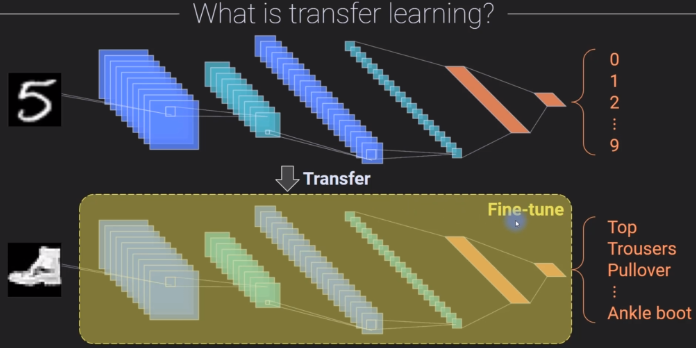

In [36]:
# create a class for the model
def createTheMNISTNet(LR, printtoggle=False):

    class mnistNet(nn.Module):
        
        def __init__(self,printtoggle):
            super().__init__()

            ### convolution layers
            # 1:in_channels (gray scale) , 10:out_channels, stride=1 (No striding)
            self.conv1 = nn.Conv2d( 1,10,kernel_size=5,stride=1,padding=1)
            # since, it's a square image, therefore row_size = column_size
            # size: np.floor( (28+2*1-5)/1 )+1 = 26/2 = 13 (/2 because maxpool)

            self.conv2 = nn.Conv2d(10,20,kernel_size=5,stride=1,padding=1)
            # size: np.floor( (13+2*1-5)/1 )+1 = 11/2 = 5 (/2 because maxpool)

            # compute the number of units in FClayer (number of outputs of conv2)
            # fc1 layer has no padding or kernel, so set to padding=0 and stride=1
            expectSize = np.floor( (5+2*0-1)/1 ) + 1 
            # Since, it's a square image, therefore num_pixels_rows = num_pixels_cols
            # otherwise, we'll have to calculate 'expectSize' for rows and columns separately
            # 20:out_channels from conv2 layer
            expectSize = 20*int(expectSize**2)
            # expectSize : indicating number if input features per image

            ### fully-connected layer
            # 50 : number of Neurons
            self.fc1 = nn.Linear(expectSize,50)

            ### output layer
            self.out = nn.Linear(50,10)

            # toggle for printing out tensor sizes during forward prop
            self.print = printtoggle

        # forward pass
        def forward(self,x):

            print(f'Input: {x.shape}') if self.print else None

            # convolution -> maxpool -> relu
            # 2 : pooling window_size
            x = F.relu( F.max_pool2d( self.conv1(x), 2) )
            print(f'Layer conv1-->pool1: {x.shape}') if self.print else None

            # Again: convolution -> maxpool -> relu
            x = F.relu( F.max_pool2d( self.conv2(x), 2) )
            print(f'Layer conv2-->pool2: {x.shape}') if self.print else None

            # reshape for linear layer
            # torch.numel(input) : Returns the total number of elements in the input tensor.
            nUnits = x.shape.numel()/x.shape[0]

            # Reshaping
            x = x.view(-1,int(nUnits))

            if self.print: print(f'Vectorize : {x.shape}')

            # linear layers
            x = F.relu( self.fc1(x) )
            if self.print: print(f'Layer fc1: {x.shape}')

            x = self.out(x)
            if self.print: print(f'Layer out: {x.shape}')

            return x
  
    # create the model instance
    model = mnistNet(printtoggle)

    # loss function
    lossfunc = nn.CrossEntropyLoss()

    # optimizer
    optimizer = torch.optim.Adam(model.parameters(),lr=LR)

    return model, lossfunc, optimizer

#### Testing the shapes at each layer

In [37]:
# test the model with one batch
test_net, test_lossfun, test_optimizer = createTheMNISTNet(LR=0.001,printtoggle=True)

X,y = next(iter(train_loader_fmnist))
yHat = test_net(X)

# check sizes of model outputs and target variable
print(' ')
print(yHat.shape)
print(y.shape)

# now let's compute the loss
loss = test_lossfun(yHat,y)
print(' ')
print('Loss:')
print(loss)

# 32 : batch size

Input: torch.Size([32, 1, 28, 28])
Layer conv1-->pool1: torch.Size([32, 10, 13, 13])
Layer conv2-->pool2: torch.Size([32, 20, 5, 5])
Vectorize : torch.Size([32, 500])
Layer fc1: torch.Size([32, 50])
Layer out: torch.Size([32, 10])
 
torch.Size([32, 10])
torch.Size([32])
 
Loss:
tensor(2.2968, grad_fn=<NllLossBackward0>)


## 5. Model Training

In [38]:
def function2trainTheModel(Model, lossfunc, optimizer, train_loader, test_loader, epochs):

    losses   = torch.zeros(epochs)
    trainAcc = []
    testAcc  = []

    # loop over epochs
    for epochi in range(epochs):

        # switch on training mode
        Model.train()

        # loop over training data batches
        batchAcc  = []
        batchLoss = []
    
        # Batch Training
        for X,y in train_loader:

            # Forward pass and loss
            yHat_train = Model(X)
            loss = lossfunc(yHat_train,y)

            # Backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Loss from this batch
            batchLoss.append(loss.item())

            # Compute accuracy
            matches = torch.argmax(yHat_train,axis=1) == y     # booleans (false/true)
            matchesNumeric = matches.float()             # convert to numbers (0/1)
            accuracyPct = 100*torch.mean(matchesNumeric) # average and x100 
            batchAcc.append( accuracyPct )               # add to list of accuracies
        # End of batch loop...

        # Now that we've trained through the batches, get their average training accuracy
        trainAcc.append( np.round(np.mean(batchAcc),2 ))

        # Get average losses across the batches
        losses[epochi] = np.round(np.mean(batchLoss),2)

        # test accuracy
        Model.eval()
        X,y = next(iter(test_loader)) # extract X,y from test dataloader
        with torch.no_grad():         # deactivates autograd
            yHat_test = Model(X)
      
        # compare the following really long line of code to the training accuracy lines
        testAcc.append( np.round(100*torch.mean((torch.argmax(yHat_test,axis=1)==y).float()),2 ) )
        # End epochs

    # function output
    return trainAcc,testAcc,losses,Model

## 6.  Run the model 

In [39]:
CNN_model_mnist,lossfunc_mnist,optimizer_mnist = createTheMNISTNet(LR=0.001, printtoggle=False)

In [40]:
# took 15mins 
TrainAcc_mnist,TestAcc_mnist,Losses_mnist,trained_Model_mnist=function2trainTheModel(Model=CNN_model_mnist , 
                                                                     lossfunc=lossfunc_mnist , 
                                                                     optimizer=optimizer_mnist,
                                                                     train_loader=train_loader_mnist , 
                                                                     test_loader=test_loader_mnist, 
                                                                     epochs=10)

## 7. Results Visualization - mnist

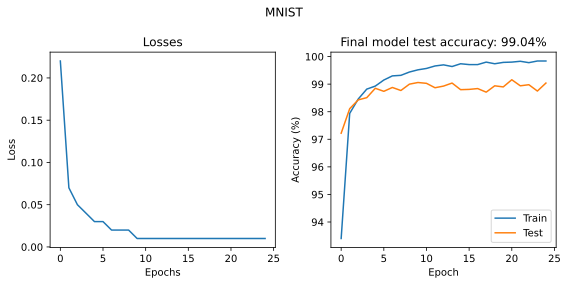

In [70]:
fig,ax = plt.subplots(1,2,figsize=(8,4))

ax[0].plot(Losses_mnist.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Losses')

ax[1].plot(TrainAcc_mnist,label='Train')
ax[1].plot(TestAcc_mnist, label='Test')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title(f'Final model test accuracy: {TestAcc_mnist[-1]:.2f}%')

ax[1].legend()
fig.suptitle("MNIST")
fig.tight_layout()

plt.show()

## 8. Testing the trained model on FMNIST data

In [45]:
# Test the model with fashion data

# Extract X,y from FASHION test dataloader
X_fmnist,y_fmnist = next(iter(test_loader_fmnist))
yHat_fmnist = trained_Model_mnist(X_fmnist)

# test acccuracy on Fmnist test data
fmnist_acc = 100*torch.mean((torch.argmax(yHat_fmnist,axis=1)==y_fmnist).float())

print(f'Mnist trained model performance on FMNIST data: {fmnist_acc:.2f}%')

Mnist trained model performance on FMNIST data: 12.24%


## 9. Fine-tune the model using one batch

In [ ]:
## NOTE about this cell: I've added print() statements in here to show that the copying works.

In [ ]:
#CNN_model_mnist,lossfunc_mnist,optimizer_mnist = createTheMNISTNet(LR=0.001, printtoggle=False)

In [47]:
# create the target model
fashionNet, lossfun_fmnist, optimizer_fmnist = createTheMNISTNet(LR=0.001, printtoggle=False)

In [48]:
# The first print function will show a non-zeros matrix because the weights of the two models differ.
print( fashionNet.conv1.weight[0] - trained_Model_mnist.conv1.weight[0] )

tensor([[[-0.0452,  0.1189,  0.0743,  0.0068, -0.0905],
         [-0.3257, -0.1479, -0.1943,  0.3617,  0.1481],
         [ 0.0087, -0.1909,  0.0359,  0.6487, -0.1450],
         [ 0.9734, -0.4974, -0.1885,  0.2610, -0.2859],
         [ 0.7216, -0.3762, -0.0082,  0.1334, -0.1015]]],
       grad_fn=<SubBackward0>)


In [57]:
# testing
for para in trained_Model_mnist.named_parameters():
    # Returns a tuple containing name of the parameter and value of it.
    print(para)
    print("\n**************\n")

('conv1.weight', Parameter containing:
tensor([[[[-1.4166e-01,  1.5721e-03, -1.5023e-01, -9.6709e-02,  1.6130e-01],
          [ 1.6196e-01,  2.5628e-01,  1.9842e-01, -1.8157e-01, -1.8428e-01],
          [-9.2121e-02,  2.9168e-01, -2.5320e-02, -6.9964e-01,  1.7992e-01],
          [-7.7802e-01,  6.0704e-01,  2.8038e-01, -3.0069e-01,  2.7176e-01],
          [-6.0141e-01,  2.3355e-01,  1.6349e-01, -2.1359e-01, -3.6878e-02]]],


        [[[-3.6764e-01, -8.2824e-02, -8.1705e-02, -1.3123e-01,  1.4585e-01],
          [ 1.3091e-01,  2.5505e-01,  1.7320e-01,  1.8916e-01,  1.6281e-01],
          [ 1.5905e-01,  2.0016e-01,  1.4039e-01, -2.0181e-01, -9.7593e-02],
          [-3.3646e-01,  1.4273e-02,  1.5381e-01, -1.9003e-02,  1.3189e-01],
          [-1.1096e-01, -6.7280e-02,  1.4377e-01,  1.8016e-02,  2.4905e-01]]],


        [[[ 1.1381e-01, -2.9650e-01, -6.7698e-01, -9.9103e-01, -2.8669e-01],
          [ 2.4080e-01,  3.6651e-01,  6.8907e-02, -1.6526e-01, -5.8267e-01],
          [ 1.4102e-01,  5.98

In [49]:
import copy

In [ ]:
# NOTE : Direct copying will not work because deepcopy() doesn't copy many features of classes.
# fashionNet = copy.deepcopy( numberNet )

In [58]:
# Replace all the weights in TARGET model from SOURCE model
for target,source in zip( fashionNet.named_parameters(), trained_Model_mnist.named_parameters()):
    target[1].data = copy.deepcopy( source[1].data ) 

In [60]:
# The second print function shows the zeros matrix because the two models have identical weights. 
print( fashionNet.conv1.weight[0] - trained_Model_mnist.conv1.weight[0] )

tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]], grad_fn=<SubBackward0>)


## 10. Now re-train the network on the Fmnist data.

In [ ]:
# trainAcc,testAcc,losses,fashionNet = function2trainTheModel(
#                                          fashionNet,fashion_train_loader,fashion_test_loader,1)

In [61]:
# took 5mins 
TrainAcc_fmnist, TestAcc_fmnist, Losses_fmnist, trained_Model_fmnist=function2trainTheModel(Model=fashionNet , 
                                                                     lossfunc=lossfun_fmnist , 
                                                                     optimizer=optimizer_fmnist,
                                                                     train_loader=train_loader_fmnist , 
                                                                     test_loader=test_loader_fmnist, 
                                                                     epochs=10)

## 11. Results Visualization - fmnist

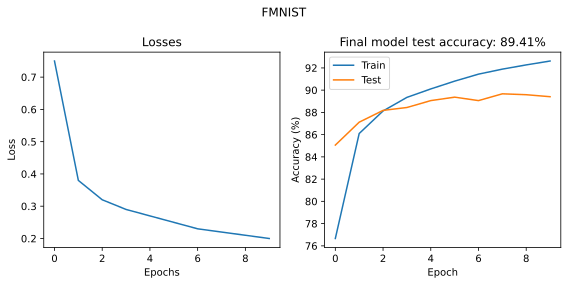

In [66]:
fig,ax = plt.subplots(1,2,figsize=(8,4))

ax[0].plot(Losses_fmnist.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Losses')

ax[1].plot(TrainAcc_fmnist,label='Train')
ax[1].plot(TestAcc_fmnist, label='Test')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title(f'Final model test accuracy: {TestAcc_fmnist[-1]:.2f}%')

ax[1].legend()
fig.suptitle("FMNIST")
fig.tight_layout()

plt.show()